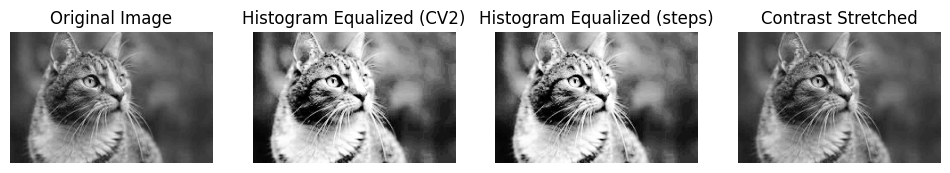

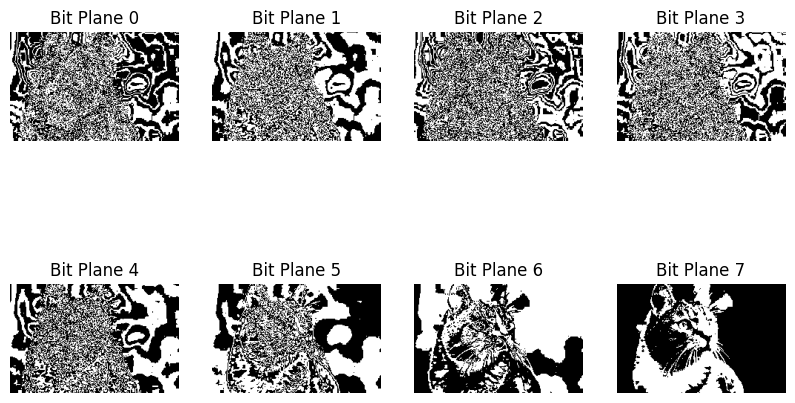

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the low-contrast image in grayscale
image = cv2.imread("cat_low_contrast.jpeg", cv2.IMREAD_GRAYSCALE)

# 1️⃣ Histogram Equalization using CV2 function
hist_eq_image = cv2.equalizeHist(image)

# 1️⃣ Histogram Equalization using steps

hist, bins = np.histogram(image, bins=256, range=(0, 256))
# Compute probability density function  (PDF)
pdf = hist / np.sum(hist)                    # histogram divided by Total number of pixels

# Compute cumulative distribution function (CDF)
cdf = np.cumsum(pdf)

# Create transformation function
equalized_values = np.round(cdf * 255 ).astype(np.uint8)   # Round of cdf with number of levels - 1

# Apply equalization
hist_eq_image2 = equalized_values[image]


# 2️⃣ Contrast Stretching
min_pixel = np.min(image)
max_pixel = np.max(image)
contrast_stretched = ((image - min_pixel) / (max_pixel - min_pixel) * 255).astype(np.uint8)
cv2.imwrite('cat_high_contrast.jpeg', contrast_stretched)

# 3️⃣ Bit-Plane Slicing
bit_planes = []
for i in range(8):
    bit_plane = (contrast_stretched & (1 << i)) >> i
    bit_planes.append(bit_plane * 255)  # Scale to 255 for visibility

# Display all images
titles = ['Original Image', 'Histogram Equalized (CV2)', 'Histogram Equalized (steps)', 'Contrast Stretched']
images = [image, hist_eq_image, hist_eq_image2, contrast_stretched]

plt.figure(figsize=(12, 4))

for i in range(4):
    plt.subplot(1, 4, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.show()

# Display bit-plane slicing results
plt.figure(figsize=(10, 6))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(bit_planes[i], cmap='gray')
    plt.title(f'Bit Plane {i}')
    plt.axis("off")

plt.show()
